In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("cleaned_data.csv", low_memory=False)
df.head()

,PUBLICATION_NUMBER,PUBLICATION_DATE,IPO_LOCATION,APPLICATION_TYPE_DESC,APPLICATION_NUMBER,DATE_OF_FILING,TITLE_OF_INVENTION,FIELD_OF_INVENTION,NO_OF_PAGES,NO_OF_CLAIMS,YEAR,FILING_YEAR,FILING_MONTH,Time_to_Grant
0,08/2016,2016-02-19,Kolkata,PCT NATIONAL PHASE APPLICATION,1592/KOLNP/2008,2008-04-22,PANEL FOR FLOOR COVERINGS AND WALL AND CEILING...,CIVIL,17,14,2016,2008,4,2859
1,12/2016,2016-03-18,Kolkata,PCT NATIONAL PHASE APPLICATION,1790/KOLNP/2010,2010-05-18,FUSED INDANE COMPOUND,CHEMISTRY,100,14,2016,2010,5,2131
2,27/2016,2016-07-01,Kolkata,PCT NATIONAL PHASE APPLICATION,857/KOLNP/2009,2009-03-05,A METHOD OF PERFORMING PHASE SHIFT-BASED PRECO...,ELECTRONICS,44,14,2016,2009,3,2675
3,40/2016,2016-09-23,Kolkata,PCT NATIONAL PHASE APPLICATION,2812/KOLNP/2011,2011-07-05,METHOD FOR REMOVING ARSENIC AS SCORODITE,CHEMISTRY,17,15,2016,2011,7,1907
4,08/2017,2017-02-24,Kolkata,PCT NATIONAL PHASE APPLICATION,2600/KOLNP/2006,2006-09-11,APPARATUS AND METHOD FOR TRANSMITTING A SUB-CH...,ELECTRONICS,29,36,2017,2006,9,3819


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283540 entries, 0 to 283539
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   PUBLICATION_NUMBER     283540 non-null  object
 1   PUBLICATION_DATE       283540 non-null  object
 2   IPO_LOCATION           283540 non-null  object
 3   APPLICATION_TYPE_DESC  283540 non-null  object
 4   APPLICATION_NUMBER     283540 non-null  object
 5   DATE_OF_FILING         283540 non-null  object
 6   TITLE_OF_INVENTION     283540 non-null  object
 7   FIELD_OF_INVENTION     283540 non-null  object
 8   NO_OF_PAGES            283482 non-null  object
 9   NO_OF_CLAIMS           283463 non-null  object
 10  YEAR                   283540 non-null  int64 
 11  FILING_YEAR            283540 non-null  int64 
 12  FILING_MONTH           283540 non-null  int64 
 13  Time_to_Grant          283540 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 30.3+ MB


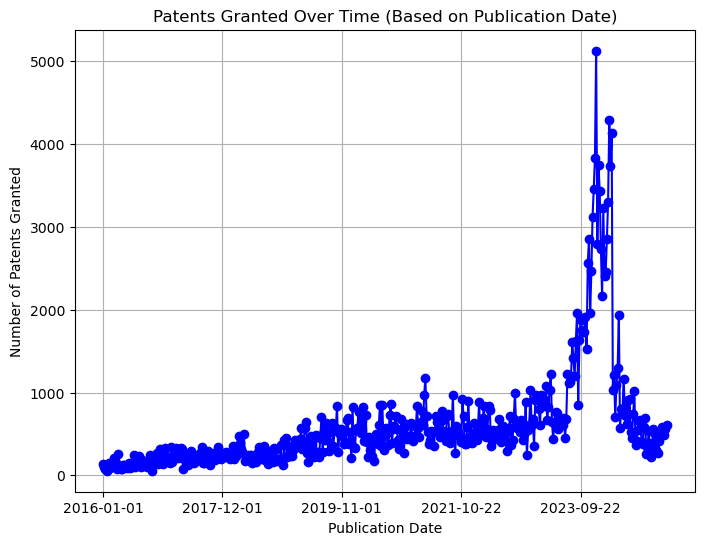

In [8]:
plt.figure(figsize=(8,6))
df.groupby('PUBLICATION_DATE').size().plot(kind='line', marker='o', color='b')
plt.xlabel('Publication Date')
plt.ylabel('Number of Patents Granted')
plt.title('Patents Granted Over Time (Based on Publication Date)')
plt.grid(True)
plt.show()

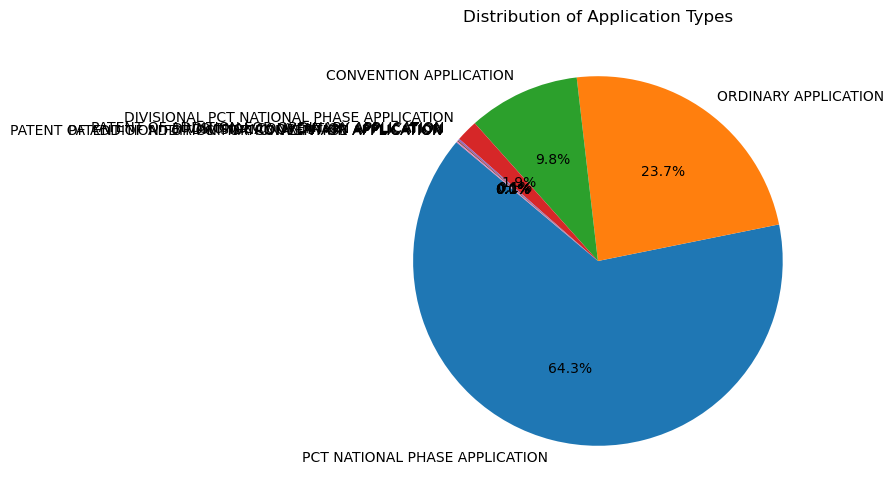

In [13]:
plt.figure(figsize=(8, 6))
df['APPLICATION_TYPE_DESC'].value_counts().plot(kind='pie', 
                            autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Application Types')
plt.ylabel('')
plt.show()

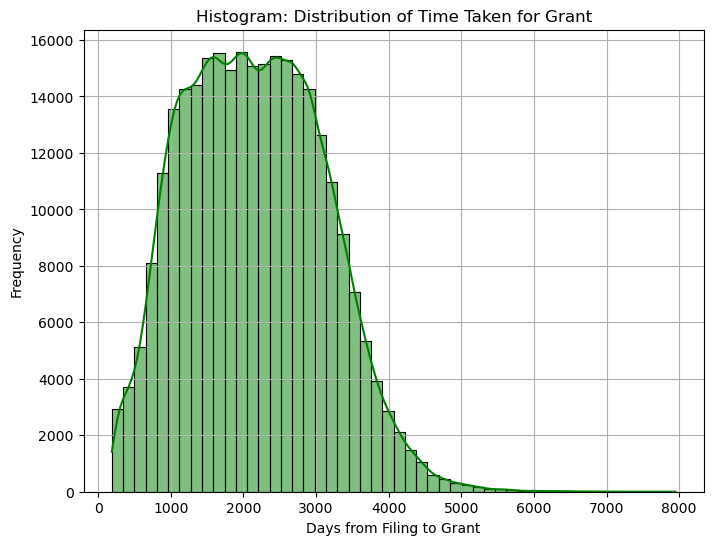

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Time_to_Grant'].dropna(), bins=50, kde=True, color='green')
plt.xlabel('Days from Filing to Grant')
plt.ylabel('Frequency')
plt.title('Histogram: Distribution of Time Taken for Grant')
plt.grid(True)
plt.show()

C:\Users\aslmy\AppData\Local\Temp\ipykernel_6228\3915187114.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="IPO_LOCATION", palette="Set2", order=df["IPO_LOCATION"].value_counts().index)


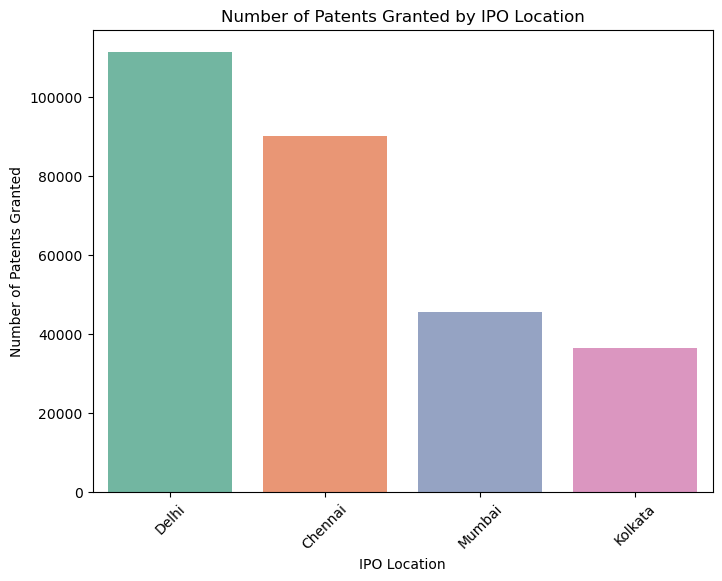

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="IPO_LOCATION", palette="Set2", order=df["IPO_LOCATION"].value_counts().index)
plt.xlabel("IPO Location")
plt.ylabel("Number of Patents Granted")
plt.title("Number of Patents Granted by IPO Location")
plt.xticks(rotation=45)  
plt.show()

<Figure size 800x600 with 0 Axes>

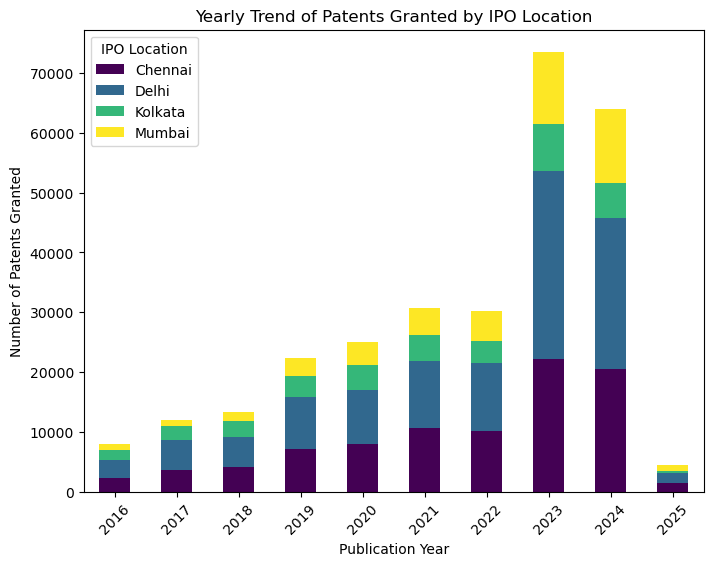

In [20]:
plt.figure(figsize=(8, 6))

df.groupby([df["YEAR"], "IPO_LOCATION"]).size().unstack().plot(
    kind="bar",
    stacked=True,
    figsize=(8, 6),
    colormap="viridis"
)
plt.xlabel("Publication Year")
plt.ylabel("Number of Patents Granted")
plt.title("Yearly Trend of Patents Granted by IPO Location")
plt.legend(title="IPO Location")
plt.xticks(rotation=45)
plt.show()


<Figure size 800x600 with 0 Axes>

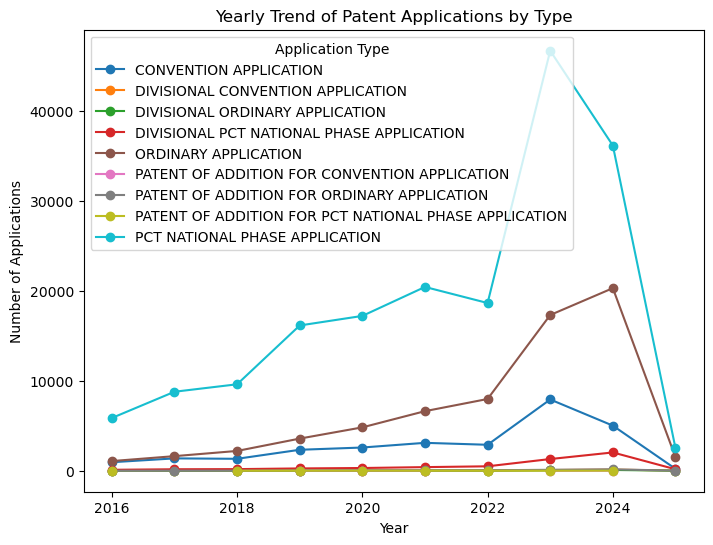

In [22]:
df["YEAR"] = df["YEAR"]
app_df = df.groupby(["YEAR", "APPLICATION_TYPE_DESC"]).size().unstack()

plt.figure(figsize=(8, 6))
app_df.plot(kind="line", marker="o", colormap="tab10", figsize=(8, 6))
plt.xlabel("Year")
plt.ylabel("Number of Applications")
plt.title("Yearly Trend of Patent Applications by Type")
plt.legend(title="Application Type")
plt.show()

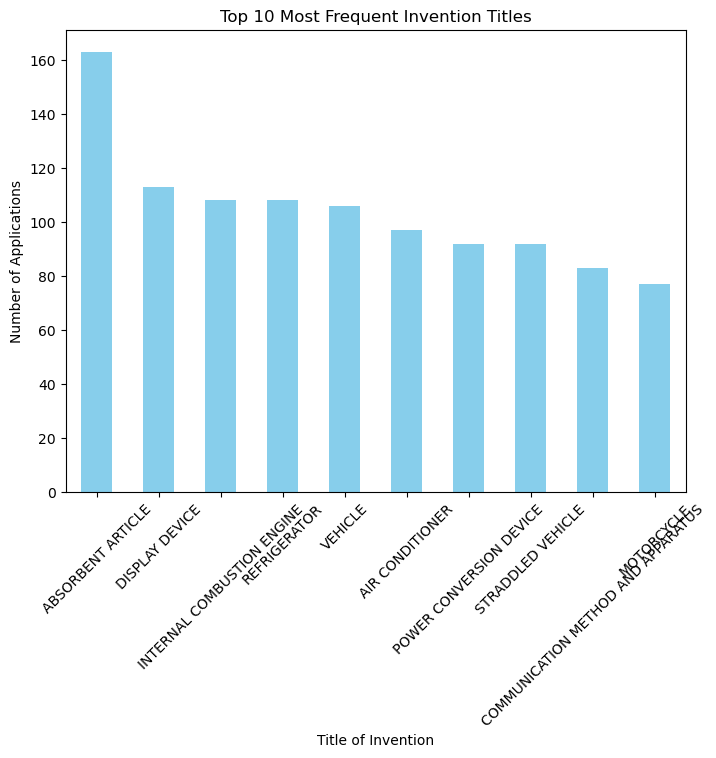

In [28]:
plt.figure(figsize=(8, 6))
df.TITLE_OF_INVENTION.value_counts().head(10).plot(kind="bar", color="skyblue")
plt.xlabel("Title of Invention")
plt.ylabel("Number of Applications")
plt.title("Top 10 Most Frequent Invention Titles")
plt.xticks(rotation=45)
plt.show()